In [14]:
!pip install pyproj -q
import pandas as pd
from datetime import datetime
import urllib.request
import seaborn as sb
import math
import matplotlib.pyplot as plt
import numpy as np

!pip install cartopy -q
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader

print(f"Librerias instaladas ! ! !")

Librerias instaladas ! ! !


In [15]:
# Establecer el estilo de seaborn
sb.set_style("whitegrid")

# Definir una paleta de colores personalizada
custom_palette = sb.color_palette("viridis", as_cmap=True)

# Configurar el estilo de matplotlib
plt.style.use('dark_background')

In [16]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [17]:
#Se formatean los datos de fecha

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT


In [18]:
columnas_deseadas = ['latitud', 'longitud']
df2 = df[columnas_deseadas].copy()
df2

,latitud,longitud
0,7.076011,-73.102501
1,7.079495,-73.105400
2,7.090290,-73.091003
3,7.067435,-73.090958
4,7.066905,-73.104980
...,...,...
1257,7.072610,-73.099487
1258,7.065252,-73.103607
1259,7.091391,-73.103264
1260,7.061083,-73.097000


In [19]:
# Valor máximo por columna
maximos = df2.max()

# Valor mínimo por columna
minimos = df2.min()

# Promedio por columna
promedio = df2.mean()

print("Valores máximos por columna:")
print(maximos)

print("\nValores mínimos por columna:")
print(minimos)

print("\nPromedio por columna:")
print(promedio)

Valores máximos por columna:
latitud      7.098318
longitud   -73.077385
dtype: float64

Valores mínimos por columna:
latitud      7.057170
longitud   -73.116966
dtype: float64

Promedio por columna:
latitud      7.077645
longitud   -73.095294
dtype: float64


In [20]:
df2.dtypes

latitud     float64
longitud    float64
dtype: object

In [21]:
import pyproj

#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)
df2['x'], df2['y'] = P(df2['longitud'], df2['latitud'])
df2

,latitud,longitud,x,y
0,7.076011,-73.102501,709584.027559,782579.281866
1,7.079495,-73.105400,709262.121378,782963.354103
2,7.090290,-73.091003,710847.924654,784163.825097
3,7.067435,-73.090958,710863.366771,781635.895608
4,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...
1257,7.072610,-73.099487,709918.546763,782204.438977
1258,7.065252,-73.103607,709466.644754,781388.734012
1259,7.091391,-73.103264,709492.782783,784279.996264
1260,7.061083,-73.097000,710198.574916,780930.648555


In [22]:
# # Importa las bibliotecas necesarias
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# # Coordenadas UTM mínimas y máximas en los ejes X e Y
# xmin = df2['x'].min()
# xmax = df2['x'].max()
# ymin = df2['y'].min()
# ymax = df2['y'].max()

# # Resolución deseada en metros
# res = 10  # 10 metros en este caso

# # Calcula el número de columnas y filas
# cols = int((xmax - xmin) / res)
# rows = int((ymax - ymin) / res)

# print("Número de columnas:", cols)
# print("Número de filas:", rows)
# print("Resolución:", res, "metros")

# # Calcular el KDE
# k = gaussian_kde([df2['x'], df2['y']])
# xi, yi = np.mgrid[xmin:xmax:cols * 1j, ymin:ymax:rows * 1j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# # Crea el mapa de calor
# plt.figure(figsize=(10, 8))
# plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
# plt.colorbar(label='Densidad de Puntos')
# plt.scatter(df2['x'], df2['y'], s=5, c='k', label='Puntos')
# plt.xlabel('Coordenada X (UTM)')
# plt.ylabel('Coordenada Y (UTM)')
# plt.title(f'Mapa de Calor con KDE ({cols} columnas x {rows} filas)')
# plt.legend()
# plt.show()


In [23]:
#Variable Resolución, puede ser utilizada para cambiar la dimensión de la matriz
resolucion = 10

#Dimensionamiento de la matriz
X_max = df2['x'].max()
X_min = df2['x'].min()
dim_X = math.ceil((X_max - X_min)/resolucion)

Y_max = df2['y'].max()
Y_min = df2['y'].min()
dim_Y = math.ceil((Y_max - Y_min)/resolucion)

print("El tamaño de la matriz es de: Columnas: ", dim_X, " y Filas: ", dim_Y)

El tamaño de la matriz es de: Columnas:  438  y Filas:  455


In [24]:
#Crear matriz de ceros
matriz = np.zeros((dim_X,dim_Y))

#Rellenamos la matriz con los datos
def distancia_p(valor, min, res):
  distancia = (valor - min)/res
  return distancia


p1x = 0
p1y = 0
for i in range(len(df2['x'])):
  #Obtener el número X,Y de la fila.
  p1x = df2['x'].iloc[i]
  p1y = df2['y'].iloc[i]
  #Convertir el número a distancia para identificar a cual fila y columna pertenece, el mínimo sirve como punto de referencia 0.
  fila_x = int(np.floor(distancia_p(p1x, X_min, resolucion)))
  fila_y = int(np.floor(distancia_p(p1y, Y_min, resolucion)))
  # print(fila_x, fila_y)

  #Una vez identificada sumamos +1 en la posición.
  matriz[fila_x,fila_y] += 1

print(matriz)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
#Prueba que la matriz haya guardado las puntuaciones
print(matriz[299,382])
np.sum(matriz)

3.0


1262.0

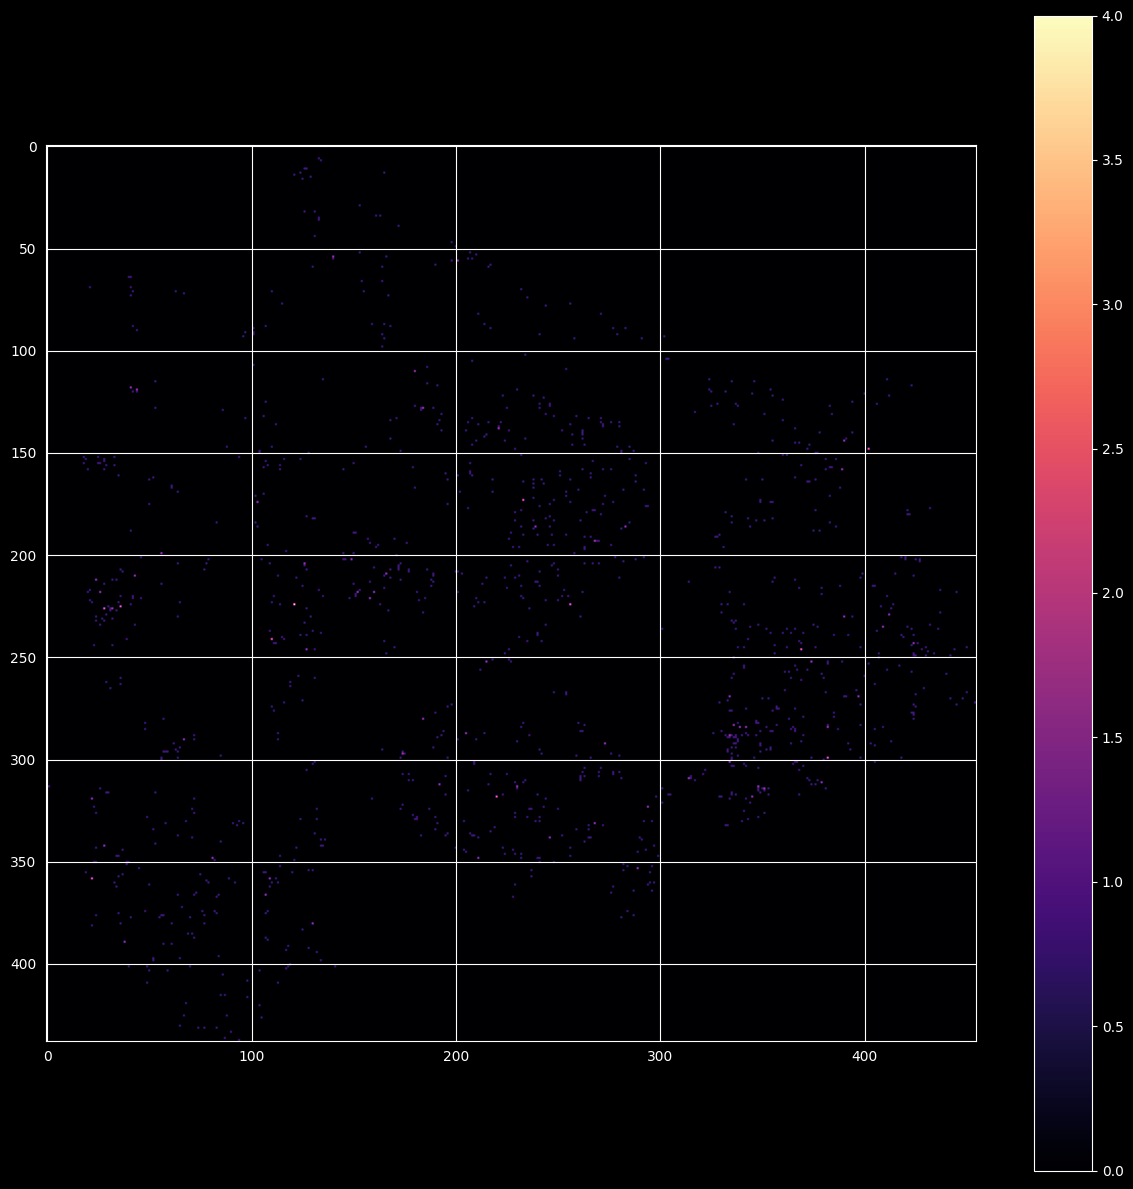

In [26]:
# Configurar el estilo de matplotlib
plt.style.use('dark_background')

# Visualización de puntos
plt.figure(figsize=(15, 15))
p = plt.imshow(matriz, cmap='magma')  # Choose an appropriate colormap if needed
plt.colorbar()  # Add colorbar for reference
plt.show()

In [27]:
#Método calcular distancia entre dos puntos
def distancia(x1,y1,x2,y2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2)

#Para hacer que el tamaño y difuminado de la matriz sea modular entonces creamos la variable de radio_circulo
radio_circulo = 200
n_resolucion = math.ceil(radio_circulo/resolucion)

#Creamos una segunda matriz que servira como copia a la anterior
matriz_densidad = np.zeros((dim_Y,dim_X))

In [28]:
matriz_ceros = matriz

#Difuminado de matriz
for i in range(dim_Y):
    Y_inicial, Y_final = np.clip([i - n_resolucion, i + n_resolucion], 0, dim_Y - 1)
    for j in range(dim_X):
        X_inicial, X_final = np.clip([j - n_resolucion, j + n_resolucion], 0, dim_X - 1)
        suma = 0
        for k in range(Y_inicial, Y_final + 1):
            for l in range(X_inicial, X_final + 1):
                d_centro = distancia(i, j, k, l)
                if (d_centro <= n_resolucion):
                    suma += matriz_ceros[l][k]

        matriz_densidad[i][j] = suma

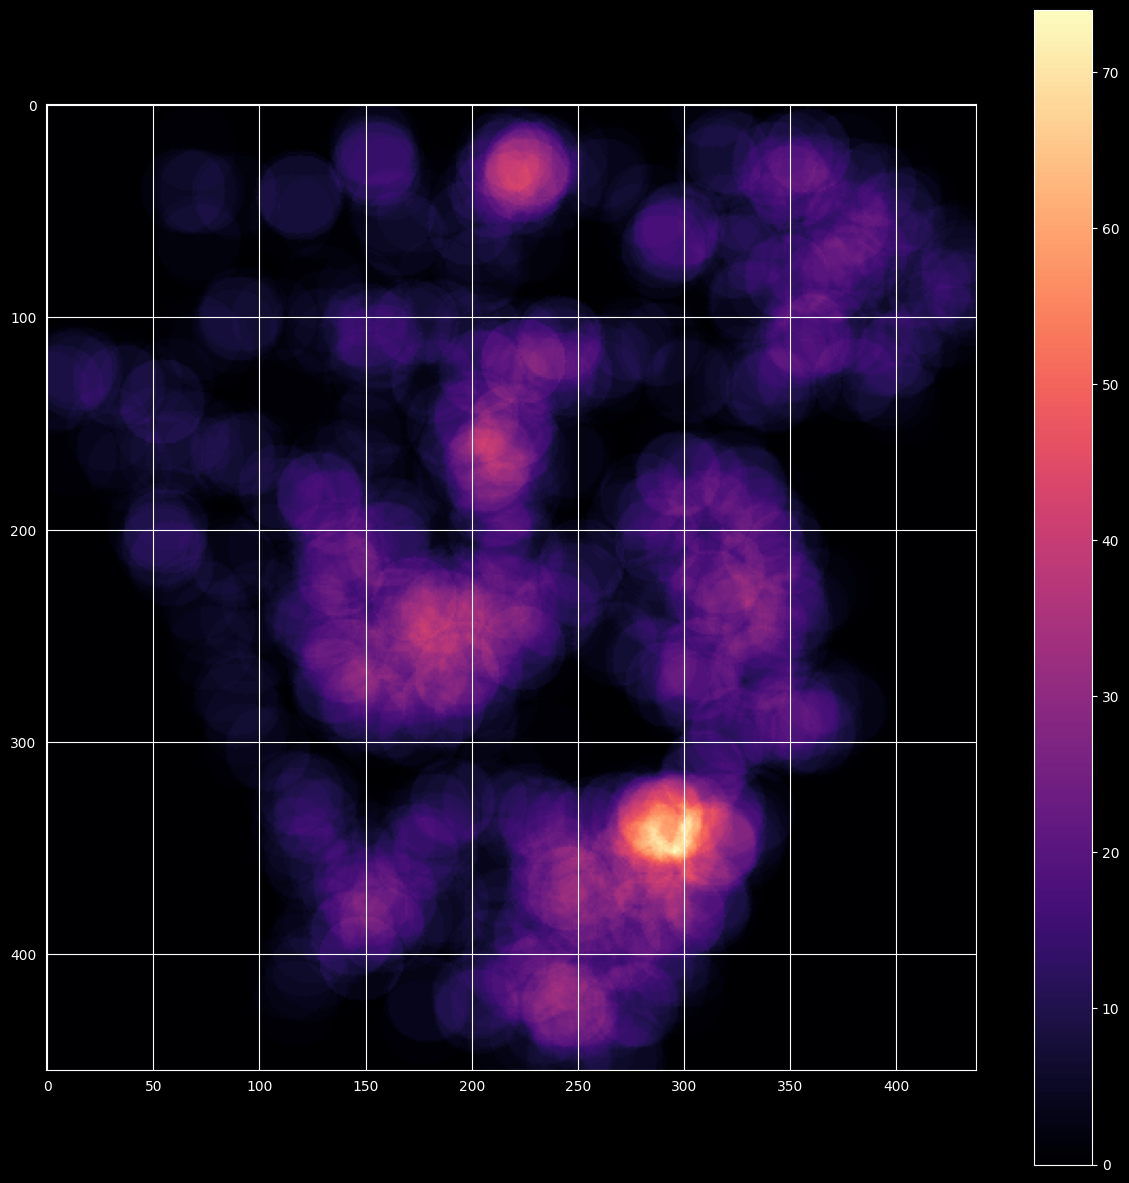

In [29]:
# Configurar el estilo de matplotlib
plt.style.use('dark_background')

# Visualización de puntos
plt.figure(figsize=(15, 15))
p = plt.imshow(matriz_densidad, cmap='magma')  # Choose an appropriate colormap if needed
plt.colorbar()  # Add colorbar for reference
plt.show()

In [30]:
import numpy as np

# Encontrar el valor máximo y mínimo excluyendo 0
valores_no_cero = matriz_densidad[matriz_densidad != 0]
max_valor = np.max(valores_no_cero)
min_valor = np.min(valores_no_cero)

# Calcular el rango
rango = max_valor - min_valor

# Definir la cantidad de franjas
cantidad_franjas = 10

# Calcular el valor que equivale a 1 franja
valor_por_franja = rango / cantidad_franjas

# Mostrar los resultados
print("Valor Máximo:", max_valor)
print("Valor Mínimo:", min_valor)
print("Rango:", rango)
print("Valor por Franja:", valor_por_franja)


Valor Máximo: 74.0
Valor Mínimo: 1.0
Rango: 73.0
Valor por Franja: 7.3


In [47]:
import colorsys

def rgb_a_hsv(r, g, b):
  (h, s, v) = colorsys.rgb_to_hsv(r, g, b)
  return (h, s, v)

def hsv_a_rgb(h, s, v):
  (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
  r = int(r)
  g = int(g)
  b = int(b)
  return (r, g, b)

In [48]:
from PIL import Image, ImageDraw

def pintar_color(r, g, b):
  img = Image.new('RGB', (300, 25))
  draw = ImageDraw.Draw(img)
  draw.rectangle([(0, 0), img.size], fill = (r,g,b))
  display(img)

#Color inicial
r_ini = 255
g_ini = 0
b_ini = 255
hsv_ini = rgb_a_hsv(r_ini, g_ini, b_ini)

#Color final
r_fin = 0
g_fin = 255
b_fin = 255
hsv_fin = rgb_a_hsv(r_fin, g_fin, b_fin)

n = 10

for i in range(n):
  h = hsv_ini[0] + i * (hsv_fin[0] - hsv_ini[0]) / (n - 1)
  s = hsv_ini[1] + i * (hsv_fin[1] - hsv_ini[1]) / (n - 1)
  v = hsv_ini[2] + i * (hsv_fin[2] - hsv_ini[2]) / (n - 1)

  (r, g, b) = hsv_a_rgb(h, s, v)
  pintar_color(r, g, b)

In [49]:
def gama_colores(color_ini, color_fin, n_colores):
  t_ini = rgb_a_hsv(color_ini[0], color_ini[1], color_ini[2])
  h_ini = t_ini[0]
  s_ini = t_ini[1]
  v_ini = t_ini[2]

  t_fin = rgb_a_hsv(color_fin[0], color_fin[1], color_fin[2])
  h_fin = t_fin[0]
  s_fin = t_fin[1]
  v_fin = t_fin[2]

  lista_colores = []
  for i in range(n_colores):
    h = h_ini + (i * (h_fin - h_ini) / (n - 1))
    s = s_ini + (i * (s_fin - s_ini) / (n - 1))
    v = v_ini + (i * (v_fin - v_ini) / (n - 1))
    t_rgb = hsv_a_rgb(h, s, v)
    lista_colores.append((t_rgb[0], t_rgb[1], t_rgb[2]))

  return lista_colores

In [55]:
lista_colores = gama_colores((255, 0, 255), (0, 255, 255), 10)
print(lista_colores)

[(255, 0, 255), (198, 0, 255), (141, 0, 255), (85, 0, 255), (28, 0, 255), (0, 28, 255), (0, 84, 255), (0, 141, 255), (0, 198, 255), (0, 255, 255)]


In [56]:
from PIL import Image
import numpy as np


pixels = [
   [(54, 54, 54), (232, 23, 93), (71, 71, 71), (168, 167, 167)],
   [(204, 82, 122), (54, 54, 54), (168, 167, 167), (232, 23, 93)],
   [(71, 71, 71), (168, 167, 167), (54, 54, 54), (204, 82, 122)],
   [(168, 167, 167), (204, 82, 122), (232, 23, 93), (54, 54, 54)]
]

# Convert the pixels into an array using numpy
array = np.array(pixels, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
display(new_image)

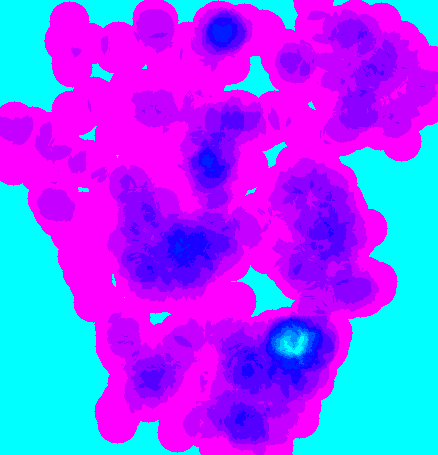

In [57]:
from PIL import Image

matriz_colores = []
for i in range(dim_Y):
  matriz_colores.append([0]*dim_X)

for i in range(dim_Y):
  for j in range(dim_X):
    indice = math.floor((matriz_densidad[i][j] - min_valor) / valor_por_franja)
    if indice >= 10:
      indice -= 1
    matriz_colores[i][j] = lista_colores[indice]

# Convert the pixels into an array using numpy
array = np.array(matriz_colores, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
display(new_image)

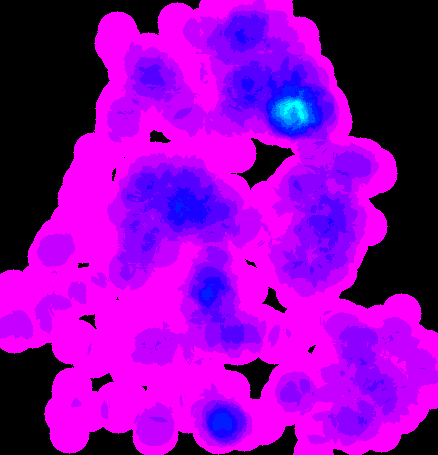

In [58]:
matriz_colores = []
for i in range(dim_Y):
    matriz_colores.append([0] * dim_X)

for i in range(dim_Y):
    for j in range(dim_X):
        if matriz_densidad[i][j] == 0:
            matriz_colores[i][j] = (0, 0, 0)  # Color blanco
        else:
            indice = math.floor((matriz_densidad[i][j] - min_valor) / valor_por_franja)
            if indice >= 10:
                indice -= 1
            matriz_colores[i][j] = lista_colores[indice]

# Convertir los píxeles en una matriz usando numpy
array = np.array(matriz_colores, dtype=np.uint8)

# Usar PIL para crear una imagen a partir de la nueva matriz de píxeles
new_image = Image.fromarray(array)

# Corregir la orientación de la imagen
new_image = new_image.transpose(Image.FLIP_TOP_BOTTOM)

display(new_image)